In [1]:
!pwd

/home/users/h/henrymi2/jupyecke/noisepy/dvv_stretching


In [2]:
dist1 = 35.68595257075233 #CH.BALST:CH.BOURR 
dist2 = 40.29792484214646 #CH.BALST:CH.MTI02 
dist3 = 46.1448667343124 #CH.BALST:CH.SAIRA
dist4 = 5.150600244956938 #CH.BOURR:CH.MTI02
dist5 = 14.83592263422154 #CH.BOURR:CH.SAIRA 
dist6 = 10.39169529995162 #CH.MTI02:CH.SAIRA 

In [3]:
# name1 = ["CH_BALST_CH_BOURR_comp_ZZ_filt0.1_1.0_stack007.npy",
#         "CH_BALST_CH_BOURR_comp_ZZ_filt0.1_1.0_stack014.npy",
#         "CH_BALST_CH_BOURR_comp_ZZ_filt0.1_1.0_stack021.npy",
#         "CH_BALST_CH_BOURR_comp_ZZ_filt0.1_1.0_stack028.npy",
#         "CH_BALST_CH_BOURR_comp_ZZ_filt0.1_1.0_stack035.npy",
#         "CH_BALST_CH_BOURR_comp_ZZ_filt0.1_1.0_stack042.npy"]
# name2 = ["CH_BALST_CH_MTI02_comp_ZZ_filt0.1_1.0_stack007.npy",
#         "CH_BALST_CH_MTI02_comp_ZZ_filt0.1_1.0_stack014.npy",
#         "CH_BALST_CH_MTI02_comp_ZZ_filt0.1_1.0_stack021.npy",
#         "CH_BALST_CH_MTI02_comp_ZZ_filt0.1_1.0_stack028.npy",
#         "CH_BALST_CH_MTI02_comp_ZZ_filt0.1_1.0_stack035.npy",
#         "CH_BALST_CH_MTI02_comp_ZZ_filt0.1_1.0_stack042.npy"]
# name3 = ["CH_BALST_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack007.npy",
#         "CH_BALST_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack014.npy",
#         "CH_BALST_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack021.npy",
#         "CH_BALST_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack028.npy",
#         "CH_BALST_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack035.npy",
#         "CH_BALST_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack042.npy"]
# name4 = ["CH_BOURR_CH_MTI02_comp_ZZ_filt0.1_1.0_stack007.npy",
#         "CH_BOURR_CH_MTI02_comp_ZZ_filt0.1_1.0_stack014.npy",
#         "CH_BOURR_CH_MTI02_comp_ZZ_filt0.1_1.0_stack021.npy",
#         "CH_BOURR_CH_MTI02_comp_ZZ_filt0.1_1.0_stack028.npy",
#         "CH_BOURR_CH_MTI02_comp_ZZ_filt0.1_1.0_stack035.npy",
#         "CH_BOURR_CH_MTI02_comp_ZZ_filt0.1_1.0_stack042.npy"]
# name5 = ["CH_BOURR_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack007.npy",
#         "CH_BOURR_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack014.npy",
#         "CH_BOURR_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack021.npy",
#         "CH_BOURR_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack028.npy",
#         "CH_BOURR_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack035.npy",
#         "CH_BOURR_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack042.npy"]
# name6 = ["CH_MTI02_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack007.npy",
#         "CH_MTI02_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack014.npy",
#         "CH_MTI02_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack021.npy",
#         "CH_MTI02_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack028.npy",
#         "CH_MTI02_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack035.npy",
#         "CH_MTI02_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack042.npy"]

In [4]:
"""
Calculate dv/v with stretching method
Takes as input a npy file containing:
CCdata: 3D array containing substacks (window time along rows, lag time along columns)
tlag: Lag time
times: timestamp of subwindows
sampling_rate: sampling rate in Hz
fmin, fmax: frequency of bandpass filter applied to CCdata
comp: component
maxlag: maximum lag time
"""
import dvv_module
import numpy as np
import os
import matplotlib.pyplot as plt
from obspy import UTCDateTime
import datetime

""" Define parameters"""
output_dir = "./stretching/"  # for fig
input_file = "../../data/msnoise_v1/stack2npy/CH_BALST_CH_MTI02_comp_ZZ_filt0.1_1.0_stack035.npy"

#EQtime = UTCDateTime("2014-05-24T09:25:02") #Aegean
#EQmag  = 6.9 #Aegean

## Define new substack length and step
#stacklen_new = np.timedelta64(10, "D") #5
#step = np.timedelta64(1, "D")

# Define reference stack start-end time
tref_start_str = "2019-12-21"
tref_end_str = "2020-03-19"
tref_start = np.datetime64(tref_start_str)
tref_end = np.datetime64(tref_end_str)

# parameters for stretching method
dvv_max = 4/100    # absolute bound for the velocity variation; example: dv=0.03 for [-3,3]% of relative velocity change ('float')
nbtrial = 100      # number of increment of dt [-epsilon,epsilon] for the streching
cc_thresh = 0.1

# Define lag time window for dv/v analysis
vmin = 2 # minimum group velocity km/s
dist = dist2 # inter-station distance in km
lwin = 15   # length of window in s
#twin = [int(dist/vmin), int(dist/vmin) + lwin]
twin = [int(1.5*dist/vmin), int(1.5*dist/vmin) + lwin]
# twin = [25, 40]
dpi=300

In [5]:
[int(1.5*dist/vmin), int(1.5*dist/vmin) + lwin]

[30, 45]

In [6]:
# CH_BALST_CH_BOURR_comp_ZZ_filt0.1_0.35_stack007.npy
# CH_BALST_CH_BOURR_comp_ZZ_filt0.1_0.35_stack014.npy
# CH_BALST_CH_BOURR_comp_ZZ_filt0.1_0.35_stack021.npy

# CH_BALST_CH_MTI02_comp_ZZ_filt0.1_0.35_stack007.npy
# CH_BALST_CH_MTI02_comp_ZZ_filt0.1_0.35_stack014.npy
# CH_BALST_CH_MTI02_comp_ZZ_filt0.1_0.35_stack021.npy

# CH_BALST_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack007.npy
# CH_BALST_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack014.npy
# CH_BALST_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack021.npy

# CH_BOURR_CH_MTI02_comp_ZZ_filt0.1_0.35_stack007.npy
# CH_BOURR_CH_MTI02_comp_ZZ_filt0.1_0.35_stack014.npy
# CH_BOURR_CH_MTI02_comp_ZZ_filt0.1_0.35_stack021.npy

# CH_BOURR_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack007.npy
# CH_BOURR_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack014.npy
# CH_BOURR_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack021.npy

# CH_MTI02_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack007.npy
# CH_MTI02_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack014.npy
# CH_MTI02_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack021.npy

# CH.BALST:CH.BOURR 35.68595257075233
# CH.BALST:CH.MTI02 40.29792484214646
# CH.BALST:CH.SAIRA 46.1448667343124
# CH.BOURR:CH.MTI02 5.150600244956938
# CH.BOURR:CH.SAIRA 14.83592263422154
# CH.MTI02:CH.SAIRA 10.39169529995162

Station pair: CH.BALST - CH.MTI02


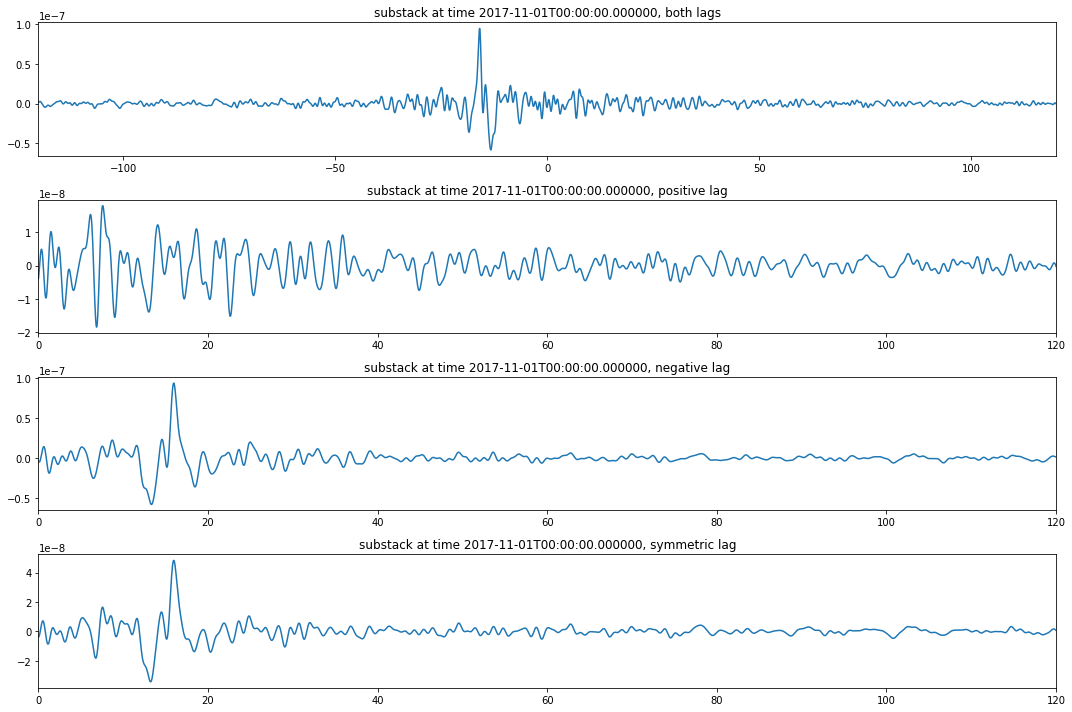

In [7]:
""" Extract data from npy and prepare it"""

# Get station names from file name
dum = os.path.split(input_file)[1].split("_stacks")[0].split("_")
sta1 = f"{dum[0]}.{dum[1]}"
sta2 = f"{dum[2]}.{dum[3]}"
print(f"Station pair: {sta1} - {sta2}")

# Read file
data = np.load(input_file, allow_pickle=True)
ndata = data["CCdata"].T
tlag_all = data["tlag"]
timestamp = data["times"].astype(np.datetime64)
sampling_rate = data["sampling_rate"]
fmin   = data["fmin"]
fmax   = data["fmax"]
comp   = data["comp"]
maxlag = data["maxlag"]
stack  = data["stack"]

# Define new substack length and step
stacklen_new = np.timedelta64(int(stack), "D") #5
step = np.timedelta64(1, "D")


#dist = data["dist"]
npts_all = ndata.shape[1]
npts = npts_all//2
tlag = tlag_all[npts:]
ndata_pos = ndata[:, npts:]  # positive lag
ndata_neg = np.fliplr(ndata[:, :npts + 1])  # negative lag
ndata_sym = np.mean(np.vstack((ndata_pos[np.newaxis], ndata_neg[np.newaxis])), axis=0)
twin_indx = np.where((tlag >= np.min(twin)) & (tlag < np.max(twin)))[0]
npts_win = len(twin_indx)

#Plot positive, negative and symmetric lags for 1st row
plot_lags = True
if plot_lags == True:
    fig, ax = plt.subplots(4, 1, figsize=(15, 10))
    ix = 0
    ax[0].plot(tlag_all, ndata[ix, :])
    ax[0].set_title(f"substack at time {timestamp[0]}, both lags")
    ax[0].set(xlim=(-maxlag,maxlag))
    ax[1].plot(tlag, ndata_pos[ix, :])
    ax[1].set_title(f"substack at time {timestamp[0]}, positive lag")
    ax[2].plot(tlag, ndata_neg[ix, :])
    ax[2].set_title(f"substack at time {timestamp[0]}, negative lag")
    ax[3].plot(tlag, ndata_sym[ix, :])
    ax[3].set_title(f"substack at time {timestamp[0]}, symmetric lag")
    for a in ax[1:]:
        a.set(xlim=(0,tlag[-1]))
    plt.tight_layout()
    plt.show()

# Get reference stack
iref = np.where((timestamp > tref_start) & (timestamp < tref_end))[0]
refstack = np.mean(ndata[iref, :], axis=0)
refstack_pos = np.mean(ndata_pos[iref, :], axis=0)
refstack_neg = np.mean(ndata_neg[iref, :], axis=0)
refstack_sym = np.mean(ndata_sym[iref, :], axis=0)

# Change substack length
_, ndata = dvv_module.change_substack_length(timestamp, ndata, stacklen_new, step, dt=1/sampling_rate)
_, ndata_sym = dvv_module.change_substack_length(timestamp, ndata_sym, stacklen_new, step, dt=1/sampling_rate)
_, ndata_pos = dvv_module.change_substack_length(timestamp, ndata_pos, stacklen_new, step, dt=1/sampling_rate)
timestamp, ndata_neg = dvv_module.change_substack_length(timestamp, ndata_neg, stacklen_new, step, dt=1/sampling_rate)


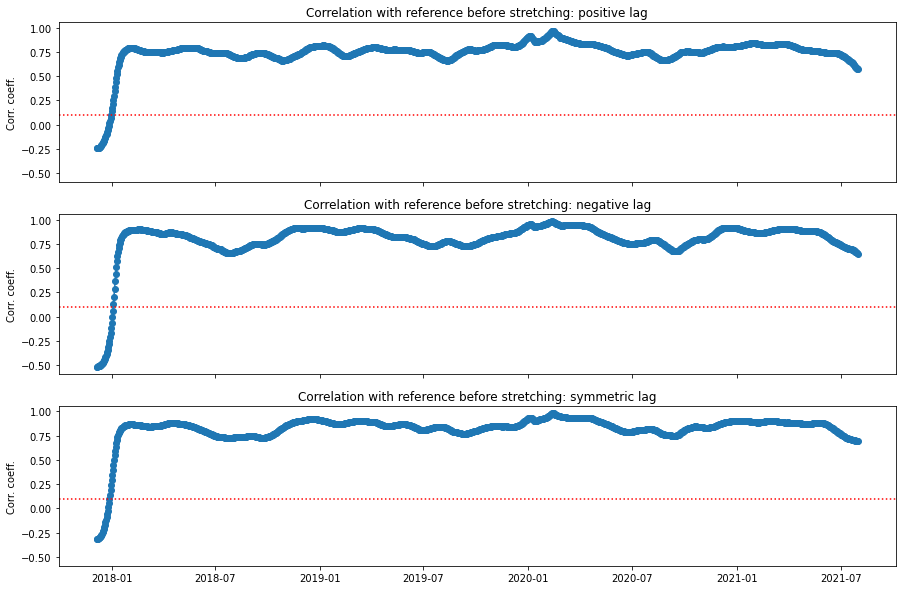

In [8]:
# Get correlation coefficient between substack and reference (before stretching)
nwin = ndata_sym.shape[0]
cc_pos = np.zeros(shape=(nwin,), dtype=np.float32)
cc_neg = np.zeros(shape=(nwin,), dtype=np.float32)
cc_sym = np.zeros(shape=(nwin,), dtype=np.float32)
for iwin in range(nwin):
    cc_pos[iwin] = np.corrcoef(refstack_pos[twin_indx], ndata_pos[iwin, twin_indx])[0, 1]
    cc_neg[iwin] = np.corrcoef(refstack_neg[twin_indx], ndata_neg[iwin, twin_indx])[0, 1]
    cc_sym[iwin] = np.corrcoef(refstack_sym[twin_indx], ndata_sym[iwin, twin_indx])[0, 1]

fig, ax = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(15,10))
ax[0].plot(timestamp, cc_pos, marker="o")
ax[0].axhline(cc_thresh, c="r", ls=":")
#ax[0].axvline(EQtime._get_datetime(), c="k", ls="--")
ax[0].set_title("Correlation with reference before stretching: positive lag")
ax[1].plot(timestamp, cc_neg, marker="o")
ax[1].axhline(cc_thresh, c="r", ls=":")
#ax[1].axvline(EQtime._get_datetime(), c="k", ls="--")
ax[1].set_title("Correlation with reference before stretching: negative lag")
ax[2].plot(timestamp, cc_sym, marker="o")
ax[2].axhline(cc_thresh, c="r", ls=":")
#ax[2].axvline(EQtime._get_datetime(), c="k", ls="--")
ax[2].set_title("Correlation with reference before stretching: symmetric lag")
for a in ax:
    a.set(ylabel="Corr. coeff.")
plt.show()

In [9]:
# # Print variables
%whos  

Variable         Type           Data/Info
-----------------------------------------
UTCDateTime      type           <class 'obspy.core.utcdatetime.UTCDateTime'>
a                Axes           Axes(0.125,0.125;0.775x0.222059)
ax               ndarray        3: 3 elems, type `object`, 24 bytes
cc_neg           ndarray        1334: 1334 elems, type `float32`, 5336 bytes
cc_pos           ndarray        1334: 1334 elems, type `float32`, 5336 bytes
cc_sym           ndarray        1334: 1334 elems, type `float32`, 5336 bytes
cc_thresh        float          0.1
comp             ndarray        : 1 elems, type `<U2`, 8 bytes
data             NpzFile        NpzFile '../../data/msnoi<...>s, sampling_rate, fmin...
datetime         module         <module 'datetime' from '<...>/python3.10/datetime.py'>
dist             float          40.29792484214646
dist1            float          35.68595257075233
dist2            float          40.29792484214646
dist3            float          46.1448667343124
d

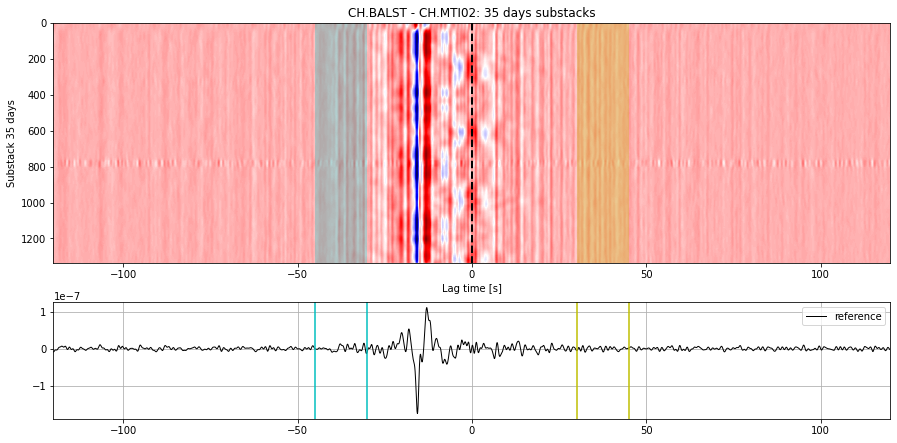

In [10]:
""" Plot cross correlation and the time window """

plt.figure(figsize=(15,15))
ax0 = plt.subplot(311)
# 2D waveform matrix
ax0.matshow(ndata,cmap='seismic',extent=[tlag_all[0],tlag_all[-1],nwin,0],aspect='auto')
ax0.set(xlabel="Lag time [s]", ylabel=f"Substack {str(stacklen_new)}" ,title=f"{sta1} - {sta2}: {str(stacklen_new)} substacks")
ax0.plot([0,0],[0,nwin],'k--',linewidth=2)
# shade the coda part
    
nwin_indx = np.where((tlag_all <= -np.min(twin)) & (tlag_all > -np.max(twin)))[0] # negative lag time indices for dvv window
pwin_indx = np.where((tlag_all >= np.min(twin)) & (tlag_all < np.max(twin)))[0] # positive lag time indices for dvv window
ax0.fill(np.concatenate((tlag_all[nwin_indx],np.flip(tlag_all[nwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*0,np.ones(len(nwin_indx))*nwin),axis=0),'c', alpha=0.3,linewidth=1)
ax0.fill(np.concatenate((tlag_all[pwin_indx],np.flip(tlag_all[pwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*0,np.ones(len(nwin_indx))*nwin),axis=0),'y', alpha=0.3)
ax0.xaxis.set_ticks_position('bottom')

# reference waveform
ax1 = plt.subplot(613)
ax1.plot(tlag_all,refstack,'k-',linewidth=1)
ax1.autoscale(enable=True, axis='x', tight=True)
ax1.grid(True)
ax1.legend(['reference'],loc='upper right')
ax1.axvline(tlag_all[nwin_indx[0]], c="c")
ax1.axvline(tlag_all[nwin_indx[-1]], c="c")
ax1.axvline(tlag_all[pwin_indx[0]], c="y")
ax1.axvline(tlag_all[pwin_indx[-1]], c="y")

plt.show()
plt.close()

In [11]:
""" Apply the stretching function 
def stretching(ref, cur, dv_range, nbtrial, para):
    This function compares the Reference waveform to stretched/compressed current waveforms to get the relative seismic velocity variation (and associated error).
    It also computes the correlation coefficient between the Reference waveform and the current waveform.

    PARAMETERS:
    ----------------
    ref: Reference waveform (np.ndarray, size N)
    cur: Current waveform (np.ndarray, size N)
    dv_range: absolute bound for the velocity variation; example: dv=0.03 for [-3,3]% of relative velocity change ('float')
    nbtrial: number of stretching coefficient between dvmin and dvmax, no need to be higher than 100  ('float')
    para: vector of the indices of the cur and ref windows on wich you want to do the measurements 
    (np.ndarray, size tmin*delta:tmax*delta)
    For error computation, we need parameters:
        fmin: minimum frequency of the data
        fmax: maximum frequency of the data
        tmin: minimum time window where the dv/v is computed
        tmax: maximum time window where the dv/v is computed
    RETURNS: dv, error, cc, cdp
    ----------------
    dv: Relative velocity change dv/v (in %)
    error: Errors in the dv/v measurements based on Weaver et al (2011), On the precision of noise-correlation interferometry, Geophys. J. Int., 185(3)
    cc: correlation coefficient between the reference waveform and the best stretched/compressed current waveform
    cdp: correlation coefficient between the reference waveform and the initial current waveform    

    Note: The code first finds the best correlation coefficient between the Reference waveform and the stretched/compressed current waveform among the "nbtrial" values.
    A refined analysis is then performed around this value to obtain a more precise dv/v measurement .
"""

param  = {
    'freq':[fmin,fmax], # frequency of bandpass filter applied to stacks
    'twin': twin,  # start-end of time window in s
    'dt': 1/sampling_rate,  # sampling interval in s
    't': tlag  # vector of lag time
}

# Allocate matrix for dvv and its uncertainty
dvv_stretch = np.empty(shape=(nwin,6),dtype=np.float32)
ccafter_stretch = np.empty(shape=(nwin,3),dtype=np.float32)
dvv_stretch[:] = np.nan
ccafter_stretch[:] = np.nan

# loop through each substack window
for iwin in range(nwin):
    
    # symmetric, casual and acausal lags for both ref and current waveform
    pcur = ndata_pos[iwin,twin_indx]   # substack, positive lag
    ncur = ndata_neg[iwin,twin_indx]   # substack, negative lag
    scur = ndata_sym[iwin,twin_indx]   # substack, symmetric lag
    pref = refstack_pos[twin_indx]  # reference, positive lag
    nref = refstack_neg[twin_indx]  # reference, negative lag
    sref = refstack_sym[twin_indx]  # reference, symmetric lag
    
    if cc_pos[iwin] >= cc_thresh: # Only keep substack if correlation coefficient before stretching above threshold
        dvv, error,ccafter_pos,cdp_pos = dvv_module.stretching_vect(pref,pcur,dvv_max,nbtrial,param)        
        # print(f"window {timestamp[iwin]} sym lag: dv/v = {dvv:.2f}, error = {error:.2f}")
        # print(f"window {timestamp[iwin]} positive lag: dv/v = {dvv:.2f}, error = {error:.2f}")
        dvv_stretch[iwin,0],dvv_stretch[iwin,1] = dvv, error
        ccafter_stretch[iwin,0] = ccafter_pos
    if cc_neg[iwin] >= cc_thresh:
        dvv, error,ccafter_neg,cdp_neg = dvv_module.stretching_vect(nref,ncur,dvv_max,nbtrial,param)        
        # print(f"window {timestamp[iwin]} pos lag: dv/v = {dvv:.2f}, error = {error:.2f}")
        # print(f"window {timestamp[iwin]} negative lag: dv/v = {dvv:.2f}, error = {error:.2f}")
        dvv_stretch[iwin,2],dvv_stretch[iwin,3] = dvv, error        
        ccafter_stretch[iwin,1] = ccafter_neg
    if cc_sym[iwin] >= cc_thresh:
        dvv, error,ccafter_sym,cdp_sym = dvv_module.stretching_vect(sref,scur,dvv_max,nbtrial,param)        
        # print(f"window {timestamp[iwin]} neg lag: dv/v = {dvv:.2f}, error = {error:.2f}")
        # print(f"window {timestamp[iwin]} sym lag: dv/v = {dvv:.2f}, error = {error:.2f}")
        dvv_stretch[iwin,4],dvv_stretch[iwin,5] = dvv, error        
        ccafter_stretch[iwin,2] = ccafter_sym
        # ccafter_stretch[iwin,2] =t = np.array(timestamp).astype(datetime)

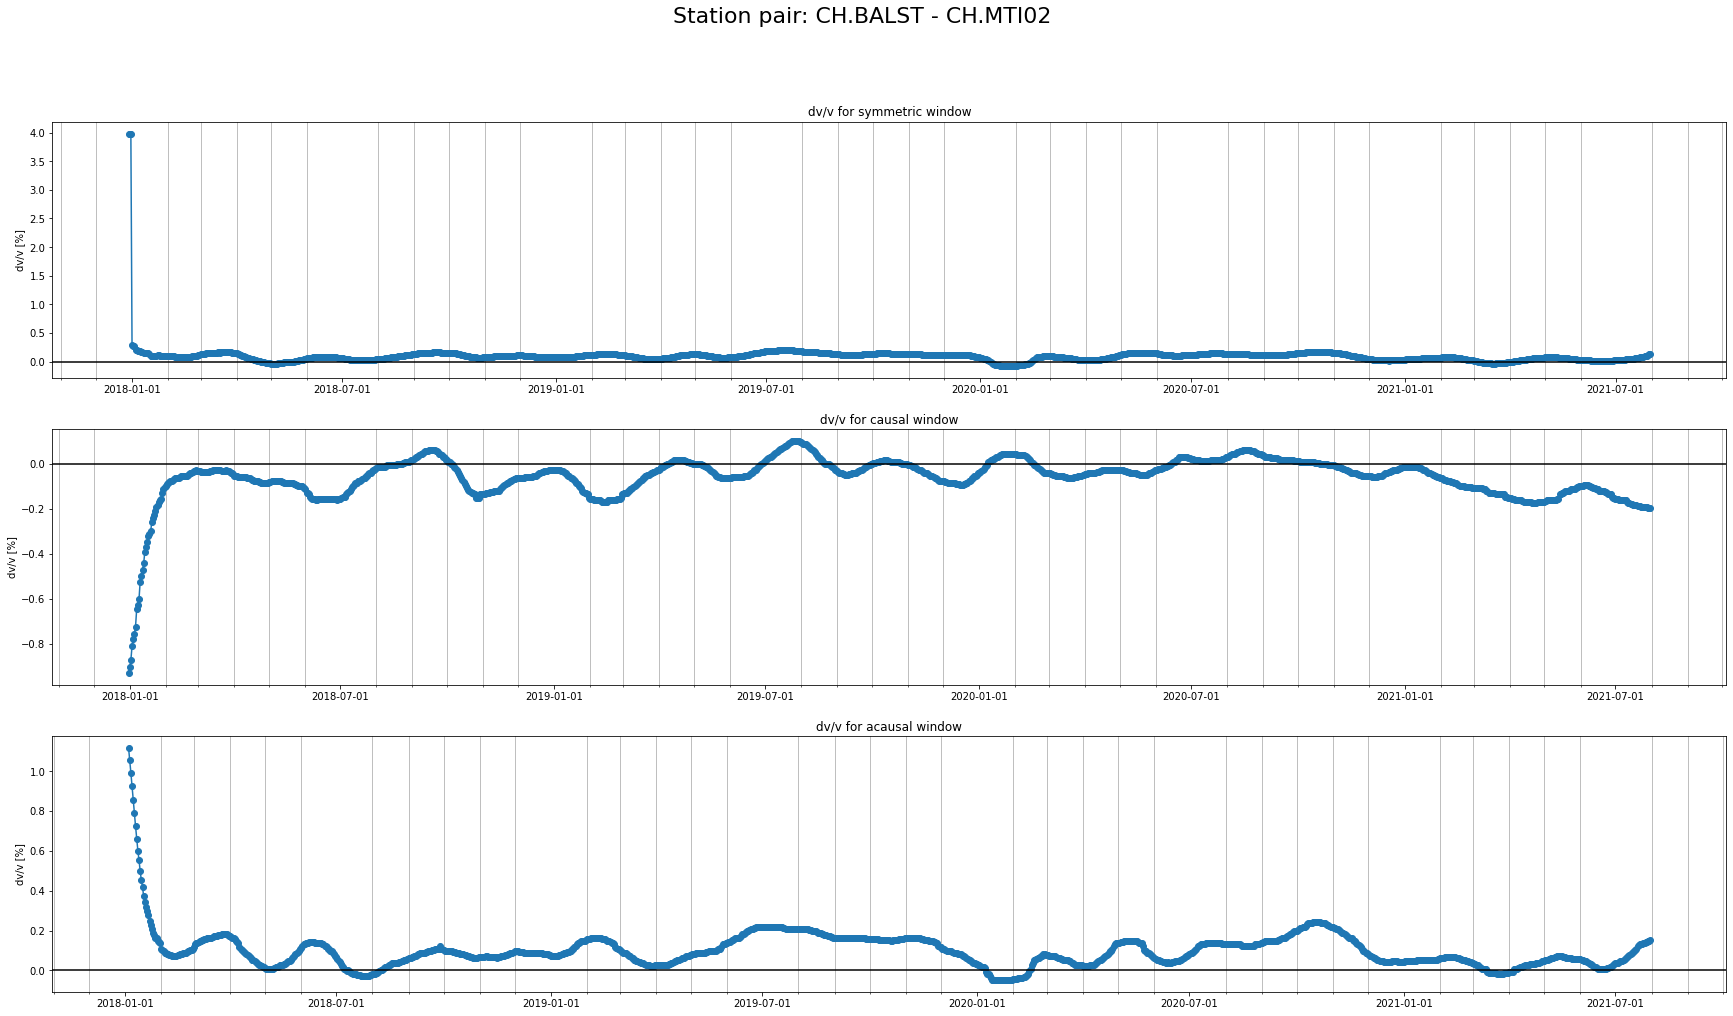

In [12]:
from datetime import datetime
import matplotlib.dates as mdates

t = np.array(timestamp).astype(datetime)
fig, axs = plt.subplots(3,1,sharex=False, sharey=False, figsize=(2*15,2*8))
fig.suptitle(f'Station pair: {sta1} - {sta2}', fontsize=22)
axs[0].plot(t, dvv_stretch[:,4], marker="o")
# axs[0].errorbar(t, dvv_stretch[:,4], yerr=dvv_stretch[:,5], c="b", capsize=2)
axs[0].set_title(f"dv/v for symmetric window")
axs[1].plot(t, dvv_stretch[:,0], marker="o")
# axs[1].errorbar(t, dvv_stretch[:,0], yerr=dvv_stretch[:,1], c="b", capsize=2)
axs[1].set_title(f"dv/v for causal window") #[positive lag]
axs[2].plot(t, dvv_stretch[:,2], marker="o")
# axs[2].errorbar(t, dvv_stretch[:,2], yerr=dvv_stretch[:,3], c="b", capsize=2)
axs[2].set_title(f"dv/v for acausal window") #[negative lag]
for ax in axs:
    # locator = mdates.HourLocator(interval=100)
    # locator.MAXTICKS = 2000
    # ax.xaxis.set_major_locator(locator)
    ax.set(ylabel="dv/v [%]")    
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    # ax.tick_params(which='major', length=10)
    ax.tick_params(which='major')
    fmt_month = mdates.MonthLocator()
    ax.xaxis.set_minor_locator(fmt_month)
    ax.xaxis.grid(True, which='minor')
    #ax.axvline(EQtime._get_datetime(), c="k", ls="--")
    ax.axhline(0, c="k", ls="-")
plt.show()
plt.close()


In [13]:
print(t.shape)
print((dvv_stretch[:,4].shape))
print((dvv_stretch[:,5].shape))

(1334,)
(1334,)
(1334,)


In [14]:
import pandas as pd

In [15]:
matrix_aux = np.vstack([t, dvv_stretch[:,4], dvv_stretch[:,5]])
matrix     = np.transpose(matrix_aux)
df = pd.DataFrame(matrix)
df.columns =['date', 'dvv', 'error']
# df.replace(-np.inf, np.nan, inplace=True)
# df.replace(np.inf, np.nan, inplace=True)
df.drop(df[abs(df.dvv) >= 1].index, inplace=True)
df.drop(df[abs(df.error) >= 0.5].index, inplace=True)
df.dropna(subset=["dvv", "error"], how="all", inplace=True)



In [19]:
print(t[0])
print(t[-1])

2017-12-06 00:00:00
2021-07-31 00:00:00


In [34]:
print(t[0])

AttributeError: 'datetime.datetime' object has no attribute 'astype'

In [21]:
print(type(t[0]))

<class 'datetime.datetime'>


In [30]:
from datetime import date
date(2017, 12, 6)

datetime.date(2017, 12, 6)

In [17]:
df

,date,dvv,error
26,2018-01-01,0.300786,0.497761
27,2018-01-02,0.281196,0.418682
28,2018-01-03,0.277931,0.357849
29,2018-01-04,0.213448,0.309324
30,2018-01-05,0.203653,0.270837
...,...,...,...
1329,2021-07-27,0.103255,0.165921
1330,2021-07-28,0.10652,0.166879
1331,2021-07-29,0.116315,0.167582
1332,2021-07-30,0.135905,0.168376


./stretching/CH.BALST_CH.MTI02_stretching_ZZ_35days_symlag_Filt0.1_1.0.pdf


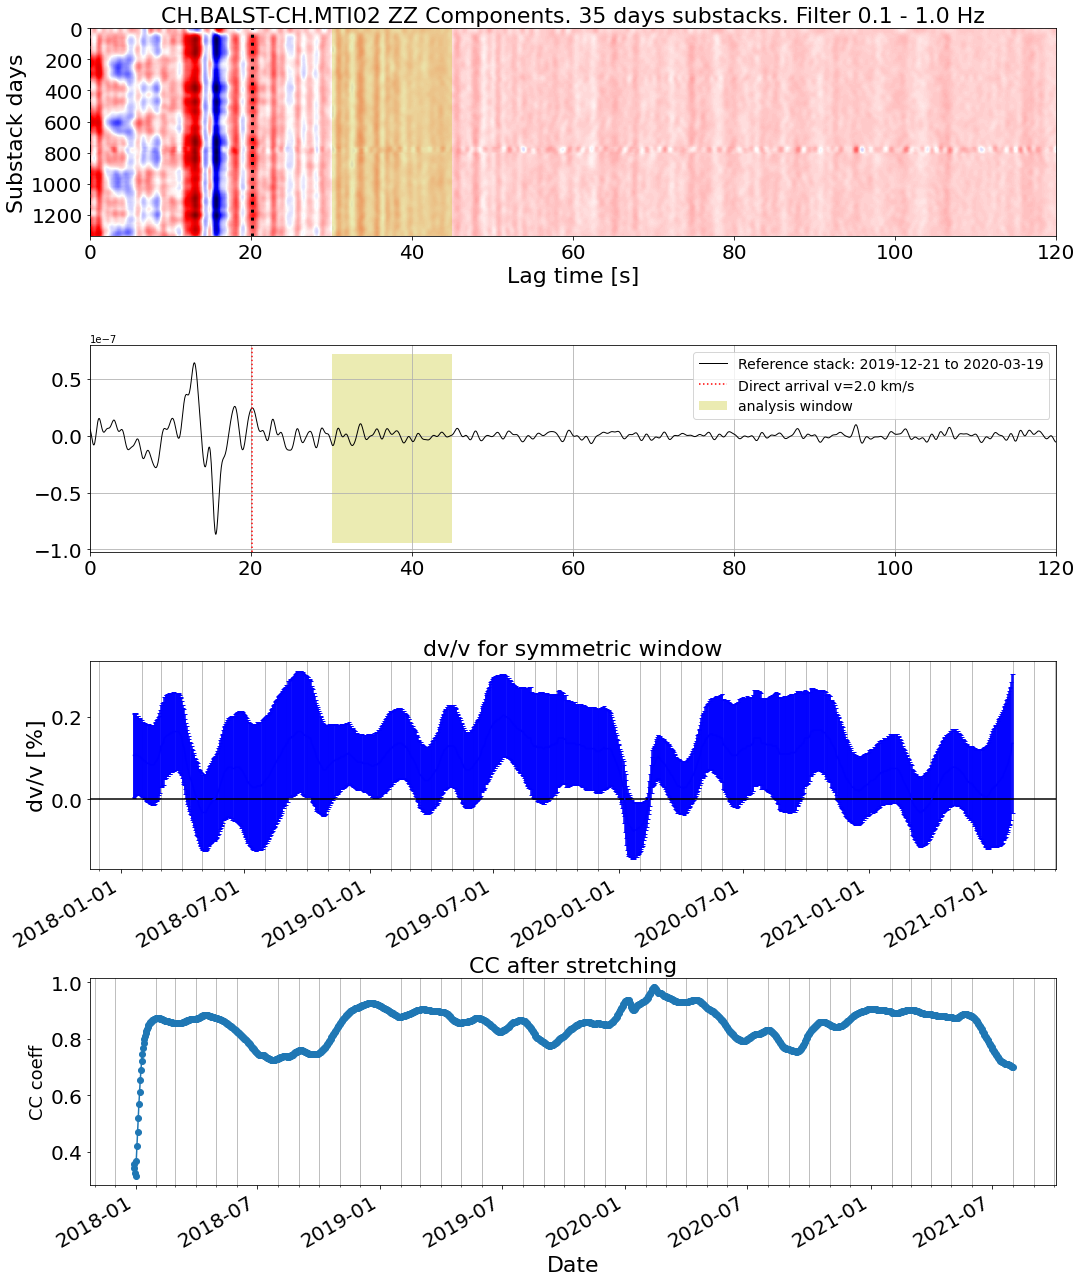

In [35]:
""" Symmetric lag plot """

plt.figure(figsize=(15,25))
ax0= plt.subplot(612)

# 2D waveform matrix
ax0.matshow(ndata_sym,cmap='seismic',extent=[tlag[0],tlag[-1],nwin,0],aspect='auto')
#ax0.set(xlabel="Lag time [s]", ylabel=f"Substack {str(stacklen_new)}") #, title=f"{sta1}-{sta2} {str(stacklen_new)} substacks")
ax0.set_xlabel("Lag time [s]", size=22)
ax0.set_ylabel(f"Substack days", size=22) #"{str(stacklen_new)}", size=22)
ax0.set_title(f"{sta1}-{sta2} {str(comp)} Components. {str(stacklen_new)} substacks. Filter {str(fmin)} - {str(fmax)} Hz", size=22)
ax0.tick_params(axis='y', labelcolor='black', labelsize='20')
ax0.tick_params(axis='x', labelcolor='black', labelsize='20')
ax0.plot([0,0],[0,nwin],'k--',linewidth=2)
# shade the coda part
pwin_indx = np.where((tlag >= np.min(twin)) & (tlag < np.max(twin)))[0] # positive lag time indices for dvv window
ax0.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*0,np.ones(len(nwin_indx))*nwin),axis=0),'y', alpha=0.3)
ax0.xaxis.set_ticks_position('bottom')
ax0.axvline(dist/vmin, c="k", ls=":", lw="3")
#ax0.legend([f"Reference stack: {tref_start_str} to {tref_end_str}", f"Direct arrival v={vmin:.1f} km/s", "analysis window"],loc='upper right')

# reference waveform
ax1 = plt.subplot(613)
ax1.plot(tlag,refstack_sym,'k-',linewidth=1)
#ax1.set_title(f"Reference stack", size=22)
ax1.autoscale(enable=True, axis='x', tight=True)
ax1.grid(True)
ax1.tick_params(axis='y', labelcolor='black', labelsize='20')
ax1.tick_params(axis='x', labelcolor='black', labelsize='20')
ax1.axvline(dist/vmin, c="r", ls=":")
ylims = ax1.get_ylim()
ax1.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*ylims[0],np.ones(len(nwin_indx))*ylims[1]),axis=0),'y', alpha=0.3)
ax1.legend([f"Reference stack: {tref_start_str} to {tref_end_str}", f"Direct arrival v={vmin:.1f} km/s", "analysis window"],loc='upper right', fontsize="14")

#ax1.axvline(tlag[pwin_indx[0]], c="y")
#ax1.axvline(tlag[pwin_indx[-1]], c="y")


# Plot dv/v
ax2 = plt.subplot(614) #614
ax2.errorbar(t[45:], dvv_stretch[45:,4], yerr=dvv_stretch[45:,5], c="b", capsize=2)
ax2.set_title(f"dv/v for symmetric window", size=22)
ax2.set_ylabel("dv/v [%]", size=22)     
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax2.tick_params(which='major', labelsize='20')
fmt_month = mdates.MonthLocator()
ax2.xaxis.set_minor_locator(fmt_month)
ax2.xaxis.grid(True, which='minor')
ax2.axhline(0, c="k", ls="-")
plt.setp(ax2.get_xticklabels(), rotation=30, ha='right')

# CC after stretching
ax3 = plt.subplot(615) # (615)
ax3.plot(t, ccafter_stretch[:,2], marker="o")
ax3.set_title(f"CC after stretching", size=22)
ax3.tick_params(axis='y', labelcolor='black', labelsize='20')
ax3.tick_params(axis='x', labelcolor='black', labelsize='20')
ax3.set_xlabel('Date', size='22', color='black')
ax3.set_ylabel("CC coeff", size=18)
fmt_month = mdates.MonthLocator()
ax3.xaxis.set_minor_locator(fmt_month)
ax3.xaxis.grid(True, which='minor')
plt.setp(ax3.get_xticklabels(), rotation=30, ha='right')

output_file = os.path.join(output_dir, f"{sta1}_{sta2}_stretching_{str(comp)}_{str(stacklen_new).replace(' ','')}\
_symlag_Filt{str(fmin)}_{str(fmax)}.pdf")
print(output_file)
plt.tight_layout(pad=0.5)
# plt.savefig(output_file, format="PDF", dpi=dpi, bbox_inches='tight')
plt.show()
plt.close()

In [36]:
print(twin)

[30, 45]


In [ ]:
pwin_indx = np.where((tlag >= np.min(twin)) & (tlag < np.max(twin)))[0] # positive lag time indices for dvv window
ax0.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*0,np.ones(len(nwin_indx))*nwin),axis=0),'y', alpha=0.3)

In [37]:
print(pwin_indx)

[601 602 603 604 605 606 607 608 609 610 611 612 613 614 615 616 617 618
 619 620 621 622 623 624 625 626 627 628 629 630 631 632 633 634 635 636
 637 638 639 640 641 642 643 644 645 646 647 648 649 650 651 652 653 654
 655 656 657 658 659 660 661 662 663 664 665 666 667 668 669 670 671 672
 673 674 675 676 677 678 679 680 681 682 683 684 685 686 687 688 689 690
 691 692 693 694 695 696 697 698 699 700 701 702 703 704 705 706 707 708
 709 710 711 712 713 714 715 716 717 718 719 720 721 722 723 724 725 726
 727 728 729 730 731 732 733 734 735 736 737 738 739 740 741 742 743 744
 745 746 747 748 749 750 751 752 753 754 755 756 757 758 759 760 761 762
 763 764 765 766 767 768 769 770 771 772 773 774 775 776 777 778 779 780
 781 782 783 784 785 786 787 788 789 790 791 792 793 794 795 796 797 798
 799 800 801 802 803 804 805 806 807 808 809 810 811 812 813 814 815 816
 817 818 819 820 821 822 823 824 825 826 827 828 829 830 831 832 833 834
 835 836 837 838 839 840 841 842 843 844 845 846 84

In [ ]:
""" Positive lag plot """

plt.figure(figsize=(15,25))
ax0= plt.subplot(612) #311
# 2D waveform matrix
ax0.matshow(ndata_pos,cmap='seismic',extent=[tlag[0],tlag[-1],nwin,0],aspect='auto')
#ax0.set(xlabel="Lag time [s]", ylabel=f"Substack {str(stacklen_new)}", title=f"{sta1} - {sta2} {str(stacklen_new)} substacks") #": {stacklen_new} substacks")
ax0.set_xlabel("Lag time [s]", size=22)
ax0.set_ylabel(f"Substack days", size=22) #"{str(stacklen_new)}", size=22)
ax0.set_title(f"{sta1}-{sta2} {str(comp)} Components. {str(stacklen_new)} substacks. Filter {str(fmin)} - {str(fmax)} Hz", size=22)
ax0.tick_params(axis='y', labelcolor='black', labelsize='20')
ax0.tick_params(axis='x', labelcolor='black', labelsize='20')
ax0.plot([0,0],[0,nwin],'k--',linewidth=2)
# shade the coda part
pwin_indx = np.where((tlag >= np.min(twin)) & (tlag < np.max(twin)))[0] # positive lag time indices for dvv window
ax0.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*0,np.ones(len(nwin_indx))*nwin),axis=0),'y', alpha=0.3)
ax0.xaxis.set_ticks_position('bottom')
ax0.axvline(dist/vmin, c="k", ls=":", lw="3")

# reference waveform
ax1 = plt.subplot(613)
ax1.plot(tlag,refstack_pos,'k-',linewidth=1)
ax1.autoscale(enable=True, axis='x', tight=True)
ax1.grid(True)
ax1.tick_params(axis='y', labelcolor='black', labelsize='20')
ax1.tick_params(axis='x', labelcolor='black', labelsize='20')
ax1.axvline(dist/vmin, c="r", ls=":")
ylims = ax1.get_ylim()
ax1.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*ylims[0],np.ones(len(nwin_indx))*ylims[1]),axis=0),'y', alpha=0.3)
ax1.legend([f"Reference stack: {tref_start_str} to {tref_end_str}", f"Direct arrival v={vmin:.1f} km/s", "analysis window"],loc='upper right', fontsize="14")

# Plot dv/v
ax2 = plt.subplot(614)
ax2.errorbar(t, dvv_stretch[:,0], yerr=dvv_stretch[:,1], c="b", capsize=2)
ax2.set_title(f"dv/v for positive lag", size=22)
ax2.set_ylabel("dv/v [%]", size=22)     
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax2.tick_params(which='major', labelsize='18')
fmt_month = mdates.MonthLocator()
ax2.xaxis.set_minor_locator(fmt_month)
ax2.xaxis.grid(True, which='minor')
ax2.axhline(0, c="k", ls="-")
plt.setp(ax2.get_xticklabels(), rotation=10, ha='right')

# CC after stretching
ax3 = plt.subplot(615)
ax3.plot(t, ccafter_stretch[:,0], marker="o")
ax3.set_title(f"CC after stretching", size=22)
ax3.tick_params(axis='y', labelcolor='black', labelsize='20')
ax3.tick_params(axis='x', labelcolor='black', labelsize='20')
ax3.set_xlabel('Date', size='22', color='black')
ax3.tick_params(which='major', labelsize='18')
ax3.set_ylabel("CC coeff", size=22)
fmt_month = mdates.MonthLocator()
ax3.xaxis.set_minor_locator(fmt_month)
ax3.xaxis.grid(True, which='minor')
plt.setp(ax3.get_xticklabels(), rotation=10, ha='right')    
    
output_file = os.path.join(output_dir, f"{sta1}_{sta2}_stretching_{str(comp)}_{str(stacklen_new).replace(' ','')}\
_poslag_Filt{str(fmin)}_{str(fmax)}.pdf")
print(output_file)
plt.tight_layout(pad=0.5)
plt.savefig(output_file, format="PDF", dpi=dpi, bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
""" Negative lag plot """

plt.figure(figsize=(15,25))
ax0= plt.subplot(612) #311
# 2D waveform matrix
ax0.matshow(ndata_neg,cmap='seismic',extent=[tlag[0],tlag[-1],nwin,0],aspect='auto')
#ax0.set(xlabel="Lag time [s]", ylabel=f"Substack {str(stacklen_new)}", title=f"{sta1} - {sta2} {str(stacklen_new)} substacks") #": {stacklen_new} substacks")
ax0.set_xlabel("Lag time [s]", size=22)
ax0.set_ylabel(f"Substack days", size=22) #"{str(stacklen_new)}", size=22)
ax0.set_title(f"{sta1}-{sta2} {str(comp)} Components. {str(stacklen_new)} substacks. Filter {str(fmin)} - {str(fmax)} Hz", size=22)
ax0.tick_params(axis='y', labelcolor='black', labelsize='20')
ax0.tick_params(axis='x', labelcolor='black', labelsize='20')
ax0.plot([0,0],[0,nwin],'k--',linewidth=2)
# shade the coda part
pwin_indx = np.where((tlag >= np.min(twin)) & (tlag < np.max(twin)))[0] # positive lag time indices for dvv window
ax0.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*0,np.ones(len(nwin_indx))*nwin),axis=0),'y', alpha=0.3)
ax0.xaxis.set_ticks_position('bottom')
ax0.axvline(dist/vmin, c="k", ls=":", lw="3")

# reference waveform
ax1 = plt.subplot(613)
ax1.plot(tlag,refstack_neg,'k-',linewidth=1)
ax1.autoscale(enable=True, axis='x', tight=True)
ax1.grid(True)
ax1.tick_params(axis='y', labelcolor='black', labelsize='20')
ax1.tick_params(axis='x', labelcolor='black', labelsize='20')
ax1.axvline(dist/vmin, c="r", ls=":")
ylims = ax1.get_ylim()
ax1.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*ylims[0],np.ones(len(nwin_indx))*ylims[1]),axis=0),'y', alpha=0.3)
ax1.legend([f"Reference stack: {tref_start_str} to {tref_end_str}", f"Direct arrival v={vmin:.1f} km/s", "analysis window"],loc='upper right', fontsize="14")

# Plot dv/v
ax2 = plt.subplot(614)
ax2.errorbar(t, dvv_stretch[:,2], yerr=dvv_stretch[:,3], c="r", capsize=2)
ax2.set_title(f"dv/v for negative lag", size=22)
ax2.set_ylabel("dv/v [%]", size=22)     
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax2.tick_params(which='major', labelsize='18')
fmt_month = mdates.MonthLocator()
ax2.xaxis.set_minor_locator(fmt_month)
ax2.xaxis.grid(True, which='minor')
ax2.axhline(0, c="k", ls="-")
plt.setp(ax2.get_xticklabels(), rotation=10, ha='right')

# CC after stretching
ax3 = plt.subplot(615)
ax3.plot(t, ccafter_stretch[:,1], marker="o")
ax3.set_title(f"CC after stretching", size=22)
ax3.tick_params(axis='y', labelcolor='black', labelsize='20')
ax3.tick_params(axis='x', labelcolor='black', labelsize='20')
ax3.set_xlabel('Date', size='22', color='black')
ax3.tick_params(which='major', labelsize='18')
ax3.set_ylabel("CC coeff", size=22)
fmt_month = mdates.MonthLocator()
ax3.xaxis.set_minor_locator(fmt_month)
ax3.xaxis.grid(True, which='minor')
plt.setp(ax3.get_xticklabels(), rotation=10, ha='right')     
    
output_file = os.path.join(output_dir, f"{sta1}_{sta2}_stretching_{str(comp)}_{str(stacklen_new).replace(' ','')}\
_neglag_Filt{str(fmin)}_{str(fmax)}.pdf")
print(output_file)
plt.tight_layout(pad=0.5)
plt.savefig(output_file, format="PDF", dpi=dpi, bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
import dvv_module
import numpy as np
import os
import matplotlib.pyplot as plt
from obspy import UTCDateTime
import datetime

output_dir = "./stretching/"
input_file = "../../data/msnoise_v1/stack2npy/CH_BOURR_CH_MTI02_comp_ZZ_filt0.1_0.35_stack007.npy"

tref_start_str = "2019-12-21"
tref_end_str = "2020-03-19"
tref_start = np.datetime64(tref_start_str)
tref_end = np.datetime64(tref_end_str)

dvv_max = 4/100  
nbtrial = 50       
cc_thresh = 0.1
vmin = 1.8 # minimum group velocity km/s
dist = 40.29792484214646 # inter-station distance in km
lwin = 30   # length of window in s
twin = [int(dist/vmin), int(dist/vmin)+lwin] 
dpi=300

# Get station names from file name
dum = os.path.split(input_file)[1].split("_stacks")[0].split("_")
sta1 = f"{dum[0]}.{dum[1]}"
sta2 = f"{dum[2]}.{dum[3]}"
print(f"Station pair: {sta1} - {sta2}")

# Read file
data = np.load(input_file, allow_pickle=True)
ndata = data["CCdata"].T
tlag_all = data["tlag"]
timestamp = data["times"].astype(np.datetime64)
sampling_rate = data["sampling_rate"]
fmin   = data["fmin"]
fmax   = data["fmax"]
comp   = data["comp"]
maxlag = data["maxlag"]
stack  = data["stack"]

# Define new substack length and step
stacklen_new = np.timedelta64(int(stack), "D") #5
step = np.timedelta64(1, "D")


#dist = data["dist"]
npts_all = ndata.shape[1]
npts = npts_all//2
tlag = tlag_all[npts:]
ndata_pos = ndata[:, npts:]  # positive lag
ndata_neg = np.fliplr(ndata[:, :npts + 1])  # negative lag
ndata_sym = np.mean(np.vstack((ndata_pos[np.newaxis], ndata_neg[np.newaxis])), axis=0)
twin_indx = np.where((tlag >= np.min(twin)) & (tlag < np.max(twin)))[0]
npts_win = len(twin_indx)

# Get reference stack
iref = np.where((timestamp > tref_start) & (timestamp < tref_end))[0]
refstack = np.mean(ndata[iref, :], axis=0)
refstack_pos = np.mean(ndata_pos[iref, :], axis=0)
refstack_neg = np.mean(ndata_neg[iref, :], axis=0)
refstack_sym = np.mean(ndata_sym[iref, :], axis=0)

# Change substack length
_, ndata = dvv_module.change_substack_length(timestamp, ndata, stacklen_new, step, dt=1/sampling_rate)
_, ndata_sym = dvv_module.change_substack_length(timestamp, ndata_sym, stacklen_new, step, dt=1/sampling_rate)
_, ndata_pos = dvv_module.change_substack_length(timestamp, ndata_pos, stacklen_new, step, dt=1/sampling_rate)
timestamp, ndata_neg = dvv_module.change_substack_length(timestamp, ndata_neg, stacklen_new, step, dt=1/sampling_rate)

# Get correlation coefficient between substack and reference (before stretching)
nwin = ndata_sym.shape[0]
cc_pos = np.zeros(shape=(nwin,), dtype=np.float32)
cc_neg = np.zeros(shape=(nwin,), dtype=np.float32)
cc_sym = np.zeros(shape=(nwin,), dtype=np.float32)
for iwin in range(nwin):
    cc_pos[iwin] = np.corrcoef(refstack_pos[twin_indx], ndata_pos[iwin, twin_indx])[0, 1]
    cc_neg[iwin] = np.corrcoef(refstack_neg[twin_indx], ndata_neg[iwin, twin_indx])[0, 1]
    cc_sym[iwin] = np.corrcoef(refstack_sym[twin_indx], ndata_sym[iwin, twin_indx])[0, 1]

param  = {
    'freq':[fmin,fmax], # frequency of bandpass filter applied to stacks
    'twin': twin,  # start-end of time window in s
    'dt': 1/sampling_rate,  # sampling interval in s
    't': tlag  # vector of lag time
}

# allocate matrix for dvv and its uncertainty
dvv_stretch = np.empty(shape=(nwin,6),dtype=np.float32)
ccafter_stretch = np.empty(shape=(nwin,3),dtype=np.float32)

dvv_stretch[:] = np.nan
ccafter_stretch[:] = np.nan

# loop through each substack window
for iwin in range(nwin):
    
    # symmetric, casual and acausal lags for both ref and current waveform
    pcur = ndata_pos[iwin,twin_indx]   # substack, positive lag
    ncur = ndata_neg[iwin,twin_indx]   # substack, negative lag
    scur = ndata_sym[iwin,twin_indx]   # substack, symmetric lag
    pref = refstack_pos[twin_indx]  # reference, positive lag
    nref = refstack_neg[twin_indx]  # reference, negative lag
    sref = refstack_sym[twin_indx]  # reference, symmetric lag
    
    if cc_pos[iwin] >= cc_thresh: # Only keep substack if correlation coefficient before stretching above threshold
        dvv, error,ccafter_pos,cdp_pos = dvv_module.stretching_vect(pref,pcur,dvv_max,nbtrial,param)        
        #print(f"window {timestamp[iwin]} sym lag: dv/v = {dvv:.2f}, error = {error:.2f}")
        # print(f"window {timestamp[iwin]} positive lag: dv/v = {dvv:.2f}, error = {error:.2f}")
        dvv_stretch[iwin,0],dvv_stretch[iwin,1] = dvv, error
        ccafter_stretch[iwin,0] = ccafter_pos
    if cc_neg[iwin] >= cc_thresh:
        dvv, error,ccafter_neg,cdp_neg = dvv_module.stretching_vect(nref,ncur,dvv_max,nbtrial,param)        
        #print(f"window {timestamp[iwin]} pos lag: dv/v = {dvv:.2f}, error = {error:.2f}")
        # print(f"window {timestamp[iwin]} negative lag: dv/v = {dvv:.2f}, error = {error:.2f}")
        dvv_stretch[iwin,2],dvv_stretch[iwin,3] = dvv, error        
        #ccafter_stretch[iwin,1] = ccafter_pos
        ccafter_stretch[iwin,1] = ccafter_neg
    if cc_sym[iwin] >= cc_thresh:
        dvv, error,ccafter_sym,cdp_sym = dvv_module.stretching_vect(sref,scur,dvv_max,nbtrial,param)        
        #print(f"window {timestamp[iwin]} neg lag: dv/v = {dvv:.2f}, error = {error:.2f}")
        # print(f"window {timestamp[iwin]} sym lag: dv/v = {dvv:.2f}, error = {error:.2f}")
        dvv_stretch[iwin,4],dvv_stretch[iwin,5] = dvv, error        
        ccafter_stretch[iwin,2] = ccafter_sym
    #print(dvv_stretch[iwin,:])

plt.figure(figsize=(15,25))
ax0= plt.subplot(612)

# 2D waveform matrix
ax0.matshow(ndata_sym,cmap='seismic',extent=[tlag[0],tlag[-1],nwin,0],aspect='auto')
#ax0.set(xlabel="Lag time [s]", ylabel=f"Substack {str(stacklen_new)}") #, title=f"{sta1}-{sta2} {str(stacklen_new)} substacks")
ax0.set_xlabel("Lag time [s]", size=22)
ax0.set_ylabel(f"Substack days", size=22) #"{str(stacklen_new)}", size=22)
ax0.set_title(f"{sta1}-{sta2} {str(comp)} Components. {str(stacklen_new)} substacks. Filter {str(fmin)} - {str(fmax)} Hz", size=22)
ax0.tick_params(axis='y', labelcolor='black', labelsize='20')
ax0.tick_params(axis='x', labelcolor='black', labelsize='20')
ax0.plot([0,0],[0,nwin],'k--',linewidth=2)
# shade the coda part
pwin_indx = np.where((tlag >= np.min(twin)) & (tlag < np.max(twin)))[0] # positive lag time indices for dvv window
ax0.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*0,np.ones(len(nwin_indx))*nwin),axis=0),'y', alpha=0.3)
ax0.xaxis.set_ticks_position('bottom')
ax0.axvline(dist/vmin, c="k", ls=":", lw="3")
#ax0.legend([f"Reference stack: {tref_start_str} to {tref_end_str}", f"Direct arrival v={vmin:.1f} km/s", "analysis window"],loc='upper right')

# reference waveform
ax1 = plt.subplot(613)
ax1.plot(tlag,refstack_sym,'k-',linewidth=1)
#ax1.set_title(f"Reference stack", size=22)
ax1.autoscale(enable=True, axis='x', tight=True)
ax1.grid(True)
ax1.tick_params(axis='y', labelcolor='black', labelsize='20')
ax1.tick_params(axis='x', labelcolor='black', labelsize='20')
ax1.axvline(dist/vmin, c="r", ls=":")
ylims = ax1.get_ylim()
ax1.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*ylims[0],np.ones(len(nwin_indx))*ylims[1]),axis=0),'y', alpha=0.3)
ax1.legend([f"Reference stack: {tref_start_str} to {tref_end_str}", f"Direct arrival v={vmin:.1f} km/s", "analysis window"],loc='upper right', fontsize="14")

#ax1.axvline(tlag[pwin_indx[0]], c="y")
#ax1.axvline(tlag[pwin_indx[-1]], c="y")


# Plot dv/v
ax2 = plt.subplot(614) #614
ax2.errorbar(t, dvv_stretch[:,4], yerr=dvv_stretch[:,5], c="b", capsize=2)
ax2.set_title(f"dv/v for symmetric window", size=22)
ax2.set_ylabel("dv/v [%]", size=22)     
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax2.tick_params(which='major', labelsize='20')
fmt_month = mdates.MonthLocator()
ax2.xaxis.set_minor_locator(fmt_month)
ax2.xaxis.grid(True, which='minor')
ax2.axhline(0, c="k", ls="-")
plt.setp(ax2.get_xticklabels(), rotation=30, ha='right')

# CC after stretching
ax3 = plt.subplot(615) # (615)
ax3.plot(t, ccafter_stretch[:,2], marker="o")
ax3.set_title(f"CC after stretching", size=22)
ax3.tick_params(axis='y', labelcolor='black', labelsize='20')
ax3.tick_params(axis='x', labelcolor='black', labelsize='20')
ax3.set_xlabel('Date', size='22', color='black')
ax3.set_ylabel("CC coeff", size=18)
fmt_month = mdates.MonthLocator()
ax3.xaxis.set_minor_locator(fmt_month)
ax3.xaxis.grid(True, which='minor')
plt.setp(ax3.get_xticklabels(), rotation=30, ha='right')

output_file = os.path.join(output_dir, f"{sta1}_{sta2}_stretching_{str(comp)}_{str(stacklen_new).replace(' ','')}\
_symlag_Filt{str(fmin)}_{str(fmax)}.pdf")
print(output_file)
plt.tight_layout(pad=0.5)
plt.savefig(output_file, format="PDF", dpi=dpi, bbox_inches='tight')
plt.show()
plt.close()

plt.figure(figsize=(15,25))
ax0= plt.subplot(612) #311
# 2D waveform matrix
ax0.matshow(ndata_pos,cmap='seismic',extent=[tlag[0],tlag[-1],nwin,0],aspect='auto')
#ax0.set(xlabel="Lag time [s]", ylabel=f"Substack {str(stacklen_new)}", title=f"{sta1} - {sta2} {str(stacklen_new)} substacks") #": {stacklen_new} substacks")
ax0.set_xlabel("Lag time [s]", size=22)
ax0.set_ylabel(f"Substack days", size=22) #"{str(stacklen_new)}", size=22)
ax0.set_title(f"{sta1}-{sta2} {str(comp)} Components. {str(stacklen_new)} substacks. Filter {str(fmin)} - {str(fmax)} Hz", size=22)
ax0.tick_params(axis='y', labelcolor='black', labelsize='20')
ax0.tick_params(axis='x', labelcolor='black', labelsize='20')
ax0.plot([0,0],[0,nwin],'k--',linewidth=2)
# shade the coda part
pwin_indx = np.where((tlag >= np.min(twin)) & (tlag < np.max(twin)))[0] # positive lag time indices for dvv window
ax0.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*0,np.ones(len(nwin_indx))*nwin),axis=0),'y', alpha=0.3)
ax0.xaxis.set_ticks_position('bottom')
ax0.axvline(dist/vmin, c="k", ls=":", lw="3")

# reference waveform
ax1 = plt.subplot(613)
ax1.plot(tlag,refstack_pos,'k-',linewidth=1)
ax1.autoscale(enable=True, axis='x', tight=True)
ax1.grid(True)
ax1.tick_params(axis='y', labelcolor='black', labelsize='20')
ax1.tick_params(axis='x', labelcolor='black', labelsize='20')
ax1.axvline(dist/vmin, c="r", ls=":")
ylims = ax1.get_ylim()
ax1.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*ylims[0],np.ones(len(nwin_indx))*ylims[1]),axis=0),'y', alpha=0.3)
ax1.legend([f"Reference stack: {tref_start_str} to {tref_end_str}", f"Direct arrival v={vmin:.1f} km/s", "analysis window"],loc='upper right', fontsize="14")

# Plot dv/v
ax2 = plt.subplot(614)
ax2.errorbar(t, dvv_stretch[:,0], yerr=dvv_stretch[:,1], c="b", capsize=2)
ax2.set_title(f"dv/v for positive lag", size=22)
ax2.set_ylabel("dv/v [%]", size=22)     
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax2.tick_params(which='major', labelsize='18')
fmt_month = mdates.MonthLocator()
ax2.xaxis.set_minor_locator(fmt_month)
ax2.xaxis.grid(True, which='minor')
ax2.axhline(0, c="k", ls="-")
plt.setp(ax2.get_xticklabels(), rotation=10, ha='right')

# CC after stretching
ax3 = plt.subplot(615)
ax3.plot(t, ccafter_stretch[:,0], marker="o")
ax3.set_title(f"CC after stretching", size=22)
ax3.tick_params(axis='y', labelcolor='black', labelsize='20')
ax3.tick_params(axis='x', labelcolor='black', labelsize='20')
ax3.set_xlabel('Date', size='22', color='black')
ax3.tick_params(which='major', labelsize='18')
ax3.set_ylabel("CC coeff", size=22)
fmt_month = mdates.MonthLocator()
ax3.xaxis.set_minor_locator(fmt_month)
ax3.xaxis.grid(True, which='minor')
plt.setp(ax3.get_xticklabels(), rotation=10, ha='right')    
    
output_file = os.path.join(output_dir, f"{sta1}_{sta2}_stretching_{str(comp)}_{str(stacklen_new).replace(' ','')}\
_poslag_Filt{str(fmin)}_{str(fmax)}.pdf")
print(output_file)
plt.tight_layout(pad=0.5)
plt.savefig(output_file, format="PDF", dpi=dpi, bbox_inches='tight')
plt.show()
plt.close()


plt.figure(figsize=(15,25))
ax0= plt.subplot(612) #311
# 2D waveform matrix
ax0.matshow(ndata_neg,cmap='seismic',extent=[tlag[0],tlag[-1],nwin,0],aspect='auto')
#ax0.set(xlabel="Lag time [s]", ylabel=f"Substack {str(stacklen_new)}", title=f"{sta1} - {sta2} {str(stacklen_new)} substacks") #": {stacklen_new} substacks")
ax0.set_xlabel("Lag time [s]", size=22)
ax0.set_ylabel(f"Substack days", size=22) #"{str(stacklen_new)}", size=22)
ax0.set_title(f"{sta1}-{sta2} {str(comp)} Components. {str(stacklen_new)} substacks. Filter {str(fmin)} - {str(fmax)} Hz", size=22)
ax0.tick_params(axis='y', labelcolor='black', labelsize='20')
ax0.tick_params(axis='x', labelcolor='black', labelsize='20')
ax0.plot([0,0],[0,nwin],'k--',linewidth=2)
# shade the coda part
pwin_indx = np.where((tlag >= np.min(twin)) & (tlag < np.max(twin)))[0] # positive lag time indices for dvv window
ax0.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*0,np.ones(len(nwin_indx))*nwin),axis=0),'y', alpha=0.3)
ax0.xaxis.set_ticks_position('bottom')
ax0.axvline(dist/vmin, c="k", ls=":", lw="3")

# reference waveform
ax1 = plt.subplot(613)
ax1.plot(tlag,refstack_neg,'k-',linewidth=1)
ax1.autoscale(enable=True, axis='x', tight=True)
ax1.grid(True)
ax1.tick_params(axis='y', labelcolor='black', labelsize='20')
ax1.tick_params(axis='x', labelcolor='black', labelsize='20')
ax1.axvline(dist/vmin, c="r", ls=":")
ylims = ax1.get_ylim()
ax1.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*ylims[0],np.ones(len(nwin_indx))*ylims[1]),axis=0),'y', alpha=0.3)
ax1.legend([f"Reference stack: {tref_start_str} to {tref_end_str}", f"Direct arrival v={vmin:.1f} km/s", "analysis window"],loc='upper right', fontsize="14")

# Plot dv/v
ax2 = plt.subplot(614)
ax2.errorbar(t, dvv_stretch[:,2], yerr=dvv_stretch[:,3], c="r", capsize=2)
ax2.set_title(f"dv/v for negative lag", size=22)
ax2.set_ylabel("dv/v [%]", size=22)     
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax2.tick_params(which='major', labelsize='18')
fmt_month = mdates.MonthLocator()
ax2.xaxis.set_minor_locator(fmt_month)
ax2.xaxis.grid(True, which='minor')
ax2.axhline(0, c="k", ls="-")
plt.setp(ax2.get_xticklabels(), rotation=10, ha='right')

# CC after stretching
ax3 = plt.subplot(615)
ax3.plot(t, ccafter_stretch[:,1], marker="o")
ax3.set_title(f"CC after stretching", size=22)
ax3.tick_params(axis='y', labelcolor='black', labelsize='20')
ax3.tick_params(axis='x', labelcolor='black', labelsize='20')
ax3.set_xlabel('Date', size='22', color='black')
ax3.tick_params(which='major', labelsize='18')
ax3.set_ylabel("CC coeff", size=22)
fmt_month = mdates.MonthLocator()
ax3.xaxis.set_minor_locator(fmt_month)
ax3.xaxis.grid(True, which='minor')
plt.setp(ax3.get_xticklabels(), rotation=10, ha='right')     
    
output_file = os.path.join(output_dir, f"{sta1}_{sta2}_stretching_{str(comp)}_{str(stacklen_new).replace(' ','')}\
_neglag_Filt{str(fmin)}_{str(fmax)}.pdf")
print(output_file)
plt.tight_layout(pad=0.5)
plt.savefig(output_file, format="PDF", dpi=dpi, bbox_inches='tight')
plt.show()
plt.close()


In [ ]:
dis =  [35.68595257075233, 40.29792484214646, 46.1448667343124, 5.150600244956938, 14.83592263422154, 10.39169529995162]


In [ ]:
array = np.array([[35.68595257075233, 40.29792484214646, 46.1448667343124, 5.150600244956938, 14.83592263422154, 10.39169529995162], ["CH_BALST_CH_BOURR_comp_ZZ_filt0.1_0.35_stack007.npy","CH_BALST_CH_MTI02_comp_ZZ_filt0.1_0.35_stack007.npy","CH_BALST_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack007.npy","CH_BOURR_CH_MTI02_comp_ZZ_filt0.1_0.35_stack007.npy", "CH_BOURR_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack007.npy", "CH_MTI02_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack007.npy"]])

In [ ]:
name = ["CH_BALST_CH_BOURR_comp_ZZ_filt0.1_0.35_stack007.npy","CH_BALST_CH_MTI02_comp_ZZ_filt0.1_0.35_stack007.npy","CH_BALST_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack007.npy","CH_BOURR_CH_MTI02_comp_ZZ_filt0.1_0.35_stack007.npy", "CH_BOURR_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack007.npy", "CH_MTI02_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack007.npy"]

In [ ]:
name1 = ["CH_BALST_CH_BOURR_comp_ZZ_filt0.1_0.35_stack014.npy","CH_BALST_CH_MTI02_comp_ZZ_filt0.1_0.35_stack014.npy","CH_BALST_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack014.npy","CH_BOURR_CH_MTI02_comp_ZZ_filt0.1_0.35_stack014.npy", "CH_BOURR_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack014.npy", "CH_MTI02_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack014.npy"]

In [ ]:
name2 = ["CH_BALST_CH_BOURR_comp_ZZ_filt0.1_0.35_stack021.npy","CH_BALST_CH_MTI02_comp_ZZ_filt0.1_0.35_stack021.npy","CH_BALST_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack021.npy","CH_BOURR_CH_MTI02_comp_ZZ_filt0.1_0.35_stack021.npy", "CH_BOURR_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack021.npy", "CH_MTI02_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack021.npy"]

In [ ]:
array = np.array([name,name1,name2])
print(array[2])

In [ ]:
name = ["CH_BALST_CH_BOURR_comp_ZZ_filt0.1_0.35_stack007.npy","CH_BALST_CH_MTI02_comp_ZZ_filt0.1_0.35_stack007.npy","CH_BALST_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack007.npy","CH_BOURR_CH_MTI02_comp_ZZ_filt0.1_0.35_stack007.npy", "CH_BOURR_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack007.npy", "CH_MTI02_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack007.npy"]
name1 = ["CH_BALST_CH_BOURR_comp_ZZ_filt0.1_0.35_stack014.npy","CH_BALST_CH_MTI02_comp_ZZ_filt0.1_0.35_stack014.npy","CH_BALST_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack014.npy","CH_BOURR_CH_MTI02_comp_ZZ_filt0.1_0.35_stack014.npy", "CH_BOURR_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack014.npy", "CH_MTI02_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack014.npy"]
name2 = ["CH_BALST_CH_BOURR_comp_ZZ_filt0.1_0.35_stack021.npy","CH_BALST_CH_MTI02_comp_ZZ_filt0.1_0.35_stack021.npy","CH_BALST_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack021.npy","CH_BOURR_CH_MTI02_comp_ZZ_filt0.1_0.35_stack021.npy", "CH_BOURR_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack021.npy", "CH_MTI02_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack021.npy"]
array = np.array([name])
fil_path = "../../data/msnoise_v9/stack2npy/"
for station_pair in array:
    for dist in dis:
        for element in station_pair:
            input_file = fil_path + element
            print(dist, input_file, type(input_file))
            
        

In [ ]:
a= "../../data/msnoise_v9/stack2npy/"
b = "CH_BALST_CH_BOURR_comp_ZZ_filt0.1_0.35_stack021.npy"
c = a + b 
print(c)

In [ ]:
# CH_BALST_CH_BOURR_comp_ZZ_filt0.1_0.35_stack007.npy
# CH_BALST_CH_BOURR_comp_ZZ_filt0.1_0.35_stack014.npy
# CH_BALST_CH_BOURR_comp_ZZ_filt0.1_0.35_stack021.npy

# CH_BALST_CH_MTI02_comp_ZZ_filt0.1_0.35_stack007.npy
# CH_BALST_CH_MTI02_comp_ZZ_filt0.1_0.35_stack014.npy
# CH_BALST_CH_MTI02_comp_ZZ_filt0.1_0.35_stack021.npy

# CH_BALST_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack007.npy
# CH_BALST_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack014.npy
# CH_BALST_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack021.npy

# CH_BOURR_CH_MTI02_comp_ZZ_filt0.1_0.35_stack007.npy
# CH_BOURR_CH_MTI02_comp_ZZ_filt0.1_0.35_stack014.npy
# CH_BOURR_CH_MTI02_comp_ZZ_filt0.1_0.35_stack021.npy

# CH_BOURR_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack007.npy
# CH_BOURR_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack014.npy
# CH_BOURR_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack021.npy

# CH_MTI02_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack007.npy
# CH_MTI02_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack014.npy
# CH_MTI02_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack021.npy

In [8]:
import dvv_module
import numpy as np
import os
import matplotlib.pyplot as plt
from obspy import UTCDateTime
import datetime

dis =  [35.68595257075233, 40.29792484214646, 46.1448667343124, 5.150600244956938, 14.83592263422154, 10.39169529995162]
name = ["CH_BALST_CH_BOURR_comp_ZZ_filt0.1_1.0_stack007.npy",
        "CH_BALST_CH_BOURR_comp_ZZ_filt0.1_1.0_stack014.npy",
        "CH_BALST_CH_BOURR_comp_ZZ_filt0.1_1.0_stack021.npy",
        "CH_BALST_CH_BOURR_comp_ZZ_filt0.1_1.0_stack028.npy",
        "CH_BALST_CH_BOURR_comp_ZZ_filt0.1_1.0_stack035.npy",
        "CH_BALST_CH_BOURR_comp_ZZ_filt0.1_1.0_stack042.npy"]
#name = ["CH_BALST_CH_BOURR_comp_ZZ_filt0.1_1.0_stack007.npy","CH_BALST_CH_MTI02_comp_ZZ_filt0.1_1.0_stack007.npy","CH_BALST_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack007.npy","CH_BOURR_CH_MTI02_comp_ZZ_filt0.1_1.0_stack007.npy", "CH_BOURR_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack007.npy", "CH_MTI02_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack007.npy"]
# name1 = ["CH_BALST_CH_BOURR_comp_ZZ_filt0.1_0.35_stack014.npy","CH_BALST_CH_MTI02_comp_ZZ_filt0.1_0.35_stack014.npy","CH_BALST_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack014.npy","CH_BOURR_CH_MTI02_comp_ZZ_filt0.1_0.35_stack014.npy", "CH_BOURR_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack014.npy", "CH_MTI02_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack014.npy"]
# name2 = ["CH_BALST_CH_BOURR_comp_ZZ_filt0.1_0.35_stack021.npy","CH_BALST_CH_MTI02_comp_ZZ_filt0.1_0.35_stack021.npy","CH_BALST_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack021.npy","CH_BOURR_CH_MTI02_comp_ZZ_filt0.1_0.35_stack021.npy", "CH_BOURR_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack021.npy", "CH_MTI02_CH_SAIRA_comp_ZZ_filt0.1_0.35_stack021.npy"]
array = np.array([name])
fil_path = "../../data/msnoise_v1/stack2npy/"
#for distance in dis:
for station_pair in array:
        for element in station_pair:
            input_file = fil_path + element
            output_dir = "./stretching/"

            tref_start_str = "2019-12-21"
            tref_end_str = "2020-03-19"
            tref_start = np.datetime64(tref_start_str)
            tref_end = np.datetime64(tref_end_str)

            dvv_max = 4/100  
            nbtrial = 50       
            cc_thresh = 0.1
            vmin = 1.8 # minimum group velocity km/s
            dist = distance # inter-station distance in km
            lwin = 30   # length of window in s
            twin = [int(dist/vmin), int(dist/vmin)+lwin] 
            dpi=300

            # Get station names from file name
            dum = os.path.split(input_file)[1].split("_stacks")[0].split("_")
            sta1 = f"{dum[0]}.{dum[1]}"
            sta2 = f"{dum[2]}.{dum[3]}"
            print(f"Station pair: {sta1} - {sta2}")

            # Read file
            data = np.load(input_file, allow_pickle=True)
            ndata = data["CCdata"].T
            tlag_all = data["tlag"]
            timestamp = data["times"].astype(np.datetime64)
            sampling_rate = data["sampling_rate"]
            fmin   = data["fmin"]
            fmax   = data["fmax"]
            comp   = data["comp"]
            maxlag = data["maxlag"]
            stack  = data["stack"]

            # Define new substack length and step
            stacklen_new = np.timedelta64(int(stack), "D") #5
            step = np.timedelta64(1, "D")


            #dist = data["dist"]
            npts_all = ndata.shape[1]
            npts = npts_all//2
            tlag = tlag_all[npts:]
            ndata_pos = ndata[:, npts:]  # positive lag
            ndata_neg = np.fliplr(ndata[:, :npts + 1])  # negative lag
            ndata_sym = np.mean(np.vstack((ndata_pos[np.newaxis], ndata_neg[np.newaxis])), axis=0)
            twin_indx = np.where((tlag >= np.min(twin)) & (tlag < np.max(twin)))[0]
            npts_win = len(twin_indx)

            # Get reference stack
            iref = np.where((timestamp > tref_start) & (timestamp < tref_end))[0]
            refstack = np.mean(ndata[iref, :], axis=0)
            refstack_pos = np.mean(ndata_pos[iref, :], axis=0)
            refstack_neg = np.mean(ndata_neg[iref, :], axis=0)
            refstack_sym = np.mean(ndata_sym[iref, :], axis=0)

            # Change substack length
            _, ndata = dvv_module.change_substack_length(timestamp, ndata, stacklen_new, step, dt=1/sampling_rate)
            _, ndata_sym = dvv_module.change_substack_length(timestamp, ndata_sym, stacklen_new, step, dt=1/sampling_rate)
            _, ndata_pos = dvv_module.change_substack_length(timestamp, ndata_pos, stacklen_new, step, dt=1/sampling_rate)
            timestamp, ndata_neg = dvv_module.change_substack_length(timestamp, ndata_neg, stacklen_new, step, dt=1/sampling_rate)

            # Get correlation coefficient between substack and reference (before stretching)
            nwin = ndata_sym.shape[0]
            cc_pos = np.zeros(shape=(nwin,), dtype=np.float32)
            cc_neg = np.zeros(shape=(nwin,), dtype=np.float32)
            cc_sym = np.zeros(shape=(nwin,), dtype=np.float32)
            for iwin in range(nwin):
                cc_pos[iwin] = np.corrcoef(refstack_pos[twin_indx], ndata_pos[iwin, twin_indx])[0, 1]
                cc_neg[iwin] = np.corrcoef(refstack_neg[twin_indx], ndata_neg[iwin, twin_indx])[0, 1]
                cc_sym[iwin] = np.corrcoef(refstack_sym[twin_indx], ndata_sym[iwin, twin_indx])[0, 1]

            param  = {
                'freq':[fmin,fmax], # frequency of bandpass filter applied to stacks
                'twin': twin,  # start-end of time window in s
                'dt': 1/sampling_rate,  # sampling interval in s
                't': tlag  # vector of lag time
            }

            # allocate matrix for dvv and its uncertainty
            dvv_stretch = np.empty(shape=(nwin,6),dtype=np.float32)
            ccafter_stretch = np.empty(shape=(nwin,3),dtype=np.float32)

            dvv_stretch[:] = np.nan
            ccafter_stretch[:] = np.nan

            # loop through each substack window
            for iwin in range(nwin):

                # symmetric, casual and acausal lags for both ref and current waveform
                pcur = ndata_pos[iwin,twin_indx]   # substack, positive lag
                ncur = ndata_neg[iwin,twin_indx]   # substack, negative lag
                scur = ndata_sym[iwin,twin_indx]   # substack, symmetric lag
                pref = refstack_pos[twin_indx]  # reference, positive lag
                nref = refstack_neg[twin_indx]  # reference, negative lag
                sref = refstack_sym[twin_indx]  # reference, symmetric lag

                if cc_pos[iwin] >= cc_thresh: # Only keep substack if correlation coefficient before stretching above threshold
                    dvv, error,ccafter_pos,cdp_pos = dvv_module.stretching_vect(pref,pcur,dvv_max,nbtrial,param)        
                    #print(f"window {timestamp[iwin]} sym lag: dv/v = {dvv:.2f}, error = {error:.2f}")
                    # print(f"window {timestamp[iwin]} positive lag: dv/v = {dvv:.2f}, error = {error:.2f}")
                    dvv_stretch[iwin,0],dvv_stretch[iwin,1] = dvv, error
                    ccafter_stretch[iwin,0] = ccafter_pos
                if cc_neg[iwin] >= cc_thresh:
                    dvv, error,ccafter_neg,cdp_neg = dvv_module.stretching_vect(nref,ncur,dvv_max,nbtrial,param)        
                    #print(f"window {timestamp[iwin]} pos lag: dv/v = {dvv:.2f}, error = {error:.2f}")
                    # print(f"window {timestamp[iwin]} negative lag: dv/v = {dvv:.2f}, error = {error:.2f}")
                    dvv_stretch[iwin,2],dvv_stretch[iwin,3] = dvv, error        
                    #ccafter_stretch[iwin,1] = ccafter_pos
                    ccafter_stretch[iwin,1] = ccafter_neg
                if cc_sym[iwin] >= cc_thresh:
                    dvv, error,ccafter_sym,cdp_sym = dvv_module.stretching_vect(sref,scur,dvv_max,nbtrial,param)        
                    #print(f"window {timestamp[iwin]} neg lag: dv/v = {dvv:.2f}, error = {error:.2f}")
                    # print(f"window {timestamp[iwin]} sym lag: dv/v = {dvv:.2f}, error = {error:.2f}")
                    dvv_stretch[iwin,4],dvv_stretch[iwin,5] = dvv, error        
                    ccafter_stretch[iwin,2] = ccafter_pos
                    #ccafter_stretch[iwin,2] = ccafter_sym
                #print(dvv_stretch[iwin,:])

            plt.figure(figsize=(15,25))
            ax0= plt.subplot(612)
            # 2D waveform matrix
            ax0.matshow(ndata_sym,cmap='seismic',extent=[tlag[0],tlag[-1],nwin,0],aspect='auto')
            #ax0.set(xlabel="Lag time [s]", ylabel=f"Substack {str(stacklen_new)}") #, title=f"{sta1}-{sta2} {str(stacklen_new)} substacks")
            ax0.set_xlabel("Lag time [s]", size=22)
            ax0.set_ylabel(f"Substack days", size=22) #"{str(stacklen_new)}", size=22)
            ax0.set_title(f"{sta1}-{sta2} {str(comp)} Components. {str(stacklen_new)} substacks. Filter {str(fmin)} - {str(fmax)} Hz", size=22)
            ax0.tick_params(axis='y', labelcolor='black', labelsize='20')
            ax0.tick_params(axis='x', labelcolor='black', labelsize='20')
            ax0.plot([0,0],[0,nwin],'k--',linewidth=2)
            # shade the coda part
            pwin_indx = np.where((tlag >= np.min(twin)) & (tlag < np.max(twin)))[0] # positive lag time indices for dvv window
            ax0.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
                np.concatenate((np.ones(len(nwin_indx))*0,np.ones(len(nwin_indx))*nwin),axis=0),'y', alpha=0.3)
            ax0.xaxis.set_ticks_position('bottom')
            ax0.axvline(dist/vmin, c="k", ls=":", lw="3")
            #ax0.legend([f"Reference stack: {tref_start_str} to {tref_end_str}", f"Direct arrival v={vmin:.1f} km/s", "analysis window"],loc='upper right')

            # reference waveform
            ax1 = plt.subplot(613)
            ax1.plot(tlag,refstack_sym,'k-',linewidth=1)
            #ax1.set_title(f"Reference stack", size=22)
            ax1.autoscale(enable=True, axis='x', tight=True)
            ax1.grid(True)
            ax1.tick_params(axis='y', labelcolor='black', labelsize='20')
            ax1.tick_params(axis='x', labelcolor='black', labelsize='20')
            ax1.axvline(dist/vmin, c="r", ls=":")
            ylims = ax1.get_ylim()
            ax1.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
                np.concatenate((np.ones(len(nwin_indx))*ylims[0],np.ones(len(nwin_indx))*ylims[1]),axis=0),'y', alpha=0.3)
            ax1.legend([f"Reference stack: {tref_start_str} to {tref_end_str}", f"Direct arrival v={vmin:.1f} km/s", "analysis window"],loc='upper right', fontsize="14")

            #ax1.axvline(tlag[pwin_indx[0]], c="y")
            #ax1.axvline(tlag[pwin_indx[-1]], c="y")


            # Plot dv/v
            ax2 = plt.subplot(614) #614
            ax2.errorbar(t, dvv_stretch[:,4], yerr=dvv_stretch[:,5], c="b", capsize=2)
            ax2.set_title(f"dv/v for symmetric window", size=22)
            ax2.set_ylabel("dv/v [%]", size=22)     
            ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
            ax2.tick_params(which='major', labelsize='20')
            fmt_month = mdates.MonthLocator()
            ax2.xaxis.set_minor_locator(fmt_month)
            ax2.xaxis.grid(True, which='minor')
            ax2.axhline(0, c="k", ls="-")
            plt.setp(ax2.get_xticklabels(), rotation=30, ha='right')

            # CC after stretching
            ax3 = plt.subplot(615) # (615)
            ax3.plot(t, ccafter_stretch[:,2], marker="o")
            ax3.set_title(f"CC after stretching", size=22)
            ax3.tick_params(axis='y', labelcolor='black', labelsize='20')
            ax3.tick_params(axis='x', labelcolor='black', labelsize='20')
            ax3.set_xlabel('Date', size='22', color='black')
            ax3.set_ylabel("CC coeff", size=18)
            fmt_month = mdates.MonthLocator()
            ax3.xaxis.set_minor_locator(fmt_month)
            ax3.xaxis.grid(True, which='minor')
            plt.setp(ax3.get_xticklabels(), rotation=30, ha='right')

            output_file = os.path.join(output_dir, f"{sta1}_{sta2}_stretching_{str(comp)}_{str(stacklen_new).replace(' ','')}\
            _symlag_Filt{str(fmin)}_{str(fmax)}.pdf")
            print(output_file)
            plt.tight_layout(pad=0.5)
            plt.savefig(output_file, format="PDF", dpi=dpi, bbox_inches='tight')
            plt.show()
            plt.close()

#             plt.figure(figsize=(15,25))
#             ax0= plt.subplot(612) #311
#             # 2D waveform matrix
#             ax0.matshow(ndata_pos,cmap='seismic',extent=[tlag[0],tlag[-1],nwin,0],aspect='auto')
#             #ax0.set(xlabel="Lag time [s]", ylabel=f"Substack {str(stacklen_new)}", title=f"{sta1} - {sta2} {str(stacklen_new)} substacks") #": {stacklen_new} substacks")
#             ax0.set_xlabel("Lag time [s]", size=22)
#             ax0.set_ylabel(f"Substack days", size=22) #"{str(stacklen_new)}", size=22)
#             ax0.set_title(f"{sta1}-{sta2} {str(comp)} Components. {str(stacklen_new)} substacks. Filter {str(fmin)} - {str(fmax)} Hz", size=22)
#             ax0.tick_params(axis='y', labelcolor='black', labelsize='20')
#             ax0.tick_params(axis='x', labelcolor='black', labelsize='20')
#             ax0.plot([0,0],[0,nwin],'k--',linewidth=2)
#             # shade the coda part
#             pwin_indx = np.where((tlag >= np.min(twin)) & (tlag < np.max(twin)))[0] # positive lag time indices for dvv window
#             ax0.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
#                 np.concatenate((np.ones(len(nwin_indx))*0,np.ones(len(nwin_indx))*nwin),axis=0),'y', alpha=0.3)
#             ax0.xaxis.set_ticks_position('bottom')
#             ax0.axvline(dist/vmin, c="k", ls=":", lw="3")

#             # reference waveform
#             ax1 = plt.subplot(613)
#             ax1.plot(tlag,refstack_pos,'k-',linewidth=1)
#             ax1.autoscale(enable=True, axis='x', tight=True)
#             ax1.grid(True)
#             ax1.tick_params(axis='y', labelcolor='black', labelsize='20')
#             ax1.tick_params(axis='x', labelcolor='black', labelsize='20')
#             ax1.axvline(dist/vmin, c="r", ls=":")
#             ylims = ax1.get_ylim()
#             ax1.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
#                 np.concatenate((np.ones(len(nwin_indx))*ylims[0],np.ones(len(nwin_indx))*ylims[1]),axis=0),'y', alpha=0.3)
#             ax1.legend([f"Reference stack: {tref_start_str} to {tref_end_str}", f"Direct arrival v={vmin:.1f} km/s", "analysis window"],loc='upper right', fontsize="14")

#             # Plot dv/v
#             ax2 = plt.subplot(614)
#             ax2.errorbar(t, dvv_stretch[:,0], yerr=dvv_stretch[:,1], c="b", capsize=2)
#             ax2.set_title(f"dv/v for positive lag", size=22)
#             ax2.set_ylabel("dv/v [%]", size=22)     
#             ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#             ax2.tick_params(which='major', labelsize='18')
#             fmt_month = mdates.MonthLocator()
#             ax2.xaxis.set_minor_locator(fmt_month)
#             ax2.xaxis.grid(True, which='minor')
#             ax2.axhline(0, c="k", ls="-")
#             plt.setp(ax2.get_xticklabels(), rotation=10, ha='right')

#             # CC after stretching
#             ax3 = plt.subplot(615)
#             ax3.plot(t, ccafter_stretch[:,0], marker="o")
#             ax3.set_title(f"CC after stretching", size=22)
#             ax3.tick_params(axis='y', labelcolor='black', labelsize='20')
#             ax3.tick_params(axis='x', labelcolor='black', labelsize='20')
#             ax3.set_xlabel('Date', size='22', color='black')
#             ax3.tick_params(which='major', labelsize='18')
#             ax3.set_ylabel("CC coeff", size=22)
#             fmt_month = mdates.MonthLocator()
#             ax3.xaxis.set_minor_locator(fmt_month)
#             ax3.xaxis.grid(True, which='minor')
#             plt.setp(ax3.get_xticklabels(), rotation=10, ha='right')    

#             output_file = os.path.join(output_dir, f"{sta1}_{sta2}_stretching_{str(comp)}_{str(stacklen_new).replace(' ','')}\
#             _poslag_Filt{str(fmin)}_{str(fmax)}.pdf")
#             print(output_file)
#             plt.tight_layout(pad=0.5)
#             plt.savefig(output_file, format="PDF", dpi=dpi, bbox_inches='tight')
#             plt.show()
#             plt.close()


#             plt.figure(figsize=(15,25))
#             ax0= plt.subplot(612) #311
#             # 2D waveform matrix
#             ax0.matshow(ndata_neg,cmap='seismic',extent=[tlag[0],tlag[-1],nwin,0],aspect='auto')
#             #ax0.set(xlabel="Lag time [s]", ylabel=f"Substack {str(stacklen_new)}", title=f"{sta1} - {sta2} {str(stacklen_new)} substacks") #": {stacklen_new} substacks")
#             ax0.set_xlabel("Lag time [s]", size=22)
#             ax0.set_ylabel(f"Substack days", size=22) #"{str(stacklen_new)}", size=22)
#             ax0.set_title(f"{sta1}-{sta2} {str(comp)} Components. {str(stacklen_new)} substacks. Filter {str(fmin)} - {str(fmax)} Hz", size=22)
#             ax0.tick_params(axis='y', labelcolor='black', labelsize='20')
#             ax0.tick_params(axis='x', labelcolor='black', labelsize='20')
#             ax0.plot([0,0],[0,nwin],'k--',linewidth=2)
#             # shade the coda part
#             pwin_indx = np.where((tlag >= np.min(twin)) & (tlag < np.max(twin)))[0] # positive lag time indices for dvv window
#             ax0.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
#                 np.concatenate((np.ones(len(nwin_indx))*0,np.ones(len(nwin_indx))*nwin),axis=0),'y', alpha=0.3)
#             ax0.xaxis.set_ticks_position('bottom')
#             ax0.axvline(dist/vmin, c="k", ls=":", lw="3")

#             # reference waveform
#             ax1 = plt.subplot(613)
#             ax1.plot(tlag,refstack_neg,'k-',linewidth=1)
#             ax1.autoscale(enable=True, axis='x', tight=True)
#             ax1.grid(True)
#             ax1.tick_params(axis='y', labelcolor='black', labelsize='20')
#             ax1.tick_params(axis='x', labelcolor='black', labelsize='20')
#             ax1.axvline(dist/vmin, c="r", ls=":")
#             ylims = ax1.get_ylim()
#             ax1.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
#                 np.concatenate((np.ones(len(nwin_indx))*ylims[0],np.ones(len(nwin_indx))*ylims[1]),axis=0),'y', alpha=0.3)
#             ax1.legend([f"Reference stack: {tref_start_str} to {tref_end_str}", f"Direct arrival v={vmin:.1f} km/s", "analysis window"],loc='upper right', fontsize="14")

#             # Plot dv/v
#             ax2 = plt.subplot(614)
#             ax2.errorbar(t, dvv_stretch[:,2], yerr=dvv_stretch[:,3], c="r", capsize=2)
#             ax2.set_title(f"dv/v for negative lag", size=22)
#             ax2.set_ylabel("dv/v [%]", size=22)     
#             ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#             ax2.tick_params(which='major', labelsize='18')
#             fmt_month = mdates.MonthLocator()
#             ax2.xaxis.set_minor_locator(fmt_month)
#             ax2.xaxis.grid(True, which='minor')
#             ax2.axhline(0, c="k", ls="-")
#             plt.setp(ax2.get_xticklabels(), rotation=10, ha='right')

#             # CC after stretching
#             ax3 = plt.subplot(615)
#             ax3.plot(t, ccafter_stretch[:,1], marker="o")
#             ax3.set_title(f"CC after stretching", size=22)
#             ax3.tick_params(axis='y', labelcolor='black', labelsize='20')
#             ax3.tick_params(axis='x', labelcolor='black', labelsize='20')
#             ax3.set_xlabel('Date', size='22', color='black')
#             ax3.tick_params(which='major', labelsize='18')
#             ax3.set_ylabel("CC coeff", size=22)
#             fmt_month = mdates.MonthLocator()
#             ax3.xaxis.set_minor_locator(fmt_month)
#             ax3.xaxis.grid(True, which='minor')
#             plt.setp(ax3.get_xticklabels(), rotation=10, ha='right')     

#             output_file = os.path.join(output_dir, f"{sta1}_{sta2}_stretching_{str(comp)}_{str(stacklen_new).replace(' ','')}\
#             _neglag_Filt{str(fmin)}_{str(fmax)}.pdf")
#             print(output_file)
#             plt.tight_layout(pad=0.5)
#             plt.savefig(output_file, format="PDF", dpi=dpi, bbox_inches='tight')
#             plt.show()
#             plt.close()

NameError: name 'distance' is not defined